In [38]:
import pandas as pd 
import numpy as np
import sys
from enum import Enum

In [39]:
assert sys.version != "3.13.2" , "wrong python version"

In [54]:
dataset = pd.read_csv(r"dataset\student_habits_performance.csv",index_col="student_id")
dataset

,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
student_id,,,,,,,,,,,,,,,
S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
S1995,21,Female,2.6,0.5,1.6,No,77.0,7.5,Fair,2,High School,Good,6,Yes,76.1
S1996,17,Female,2.9,1.0,2.4,Yes,86.0,6.8,Poor,1,High School,Average,6,Yes,65.9
S1997,20,Male,3.0,2.6,1.3,No,61.9,6.5,Good,5,Bachelor,Good,9,Yes,64.4


<Axes: xlabel='age'>

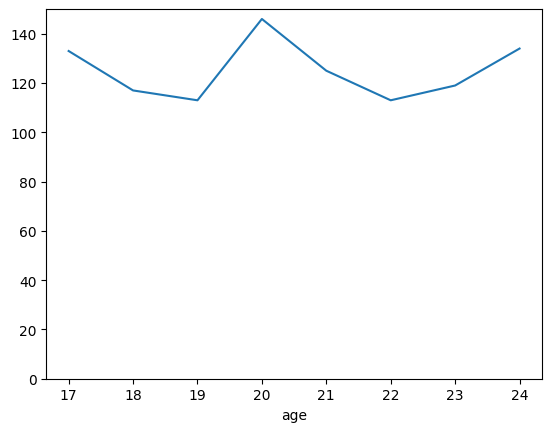

In [41]:
# pour l'age on aimerais avoir le nombre de personne de chaque age
dataset.groupby("age").size().plot(ylim=(0,150))

In [42]:
# repartition par genre
dataset.groupby("gender").size().to_frame('Number')

,Number
gender,
Female,481
Male,477
Other,42


<Axes: xlabel='exam_score'>

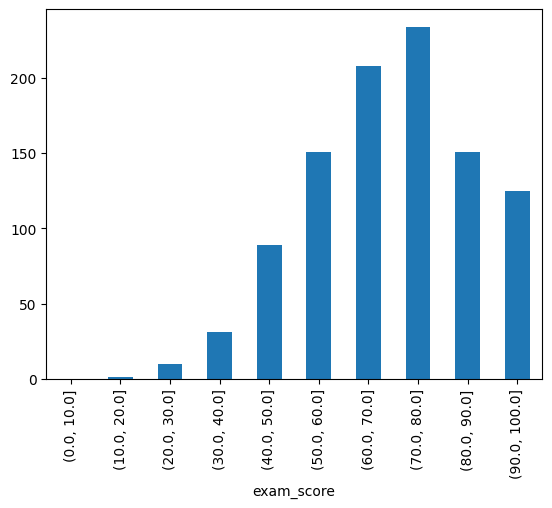

In [43]:
# pour l'age on aimerais avoir le nombre de personne de chaque age
pd.cut(dataset["exam_score"],[0,10,20,30,40,50,60,70,80,90,100.0]).value_counts().sort_index().plot(kind="bar")

On arrange maintenant le dataset pour remplacer les string par des int

In [53]:
class gender(Enum):
    FEMALE = 0
    MALE = 1
    OTHER = 2

class part_time_job(Enum):
    NO_JOB = 0
    JOB = 1

class diet(Enum):
    POOR = 0
    FAIR = 1
    GOOD = 2

class parental_education_level(Enum):
    BACHELOR = 0
    HIGHSCHOOL = 1
    MASTER = 2

# extracurricular participation = activité extrascolaire
class extra_activity(Enum):
    NO_ACTIVITY = 0
    ACTIVITY = 1

class INTERNET(Enum):
    POOR = 0
    AVERAGE = 1
    GOOD = 2

gender_map = {"Female":0,"Male":1,"Other":2}
job_map = {"No":0,"Yes":1}
diet_map  ={"Poor":0,"Fair":1,"Good":2}
parentlevel_map = {"Bachelor":0,"High School":1,"Master":2}
extraactivity_map = {"No":0,"Yes":1}
internet_map = {"Poor":0,"Average":1,"Good":2}

In [55]:
dataset["gender"] = dataset["gender"].map(gender_map)
dataset["part_time_job"] = dataset["part_time_job"].map(job_map)
dataset["diet_quality"] = dataset["diet_quality"].map(diet_map)
dataset["parental_education_level"] = dataset["parental_education_level"].map(parentlevel_map)
dataset["extracurricular_participation"] = dataset["extracurricular_participation"].map(extraactivity_map)
dataset["internet_quality"] = dataset["internet_quality"].map(internet_map)

dataset

,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
student_id,,,,,,,,,,,,,,,
S1000,23,0,0.0,1.2,1.1,0,85.0,8.0,1,6,2.0,1,8,1,56.2
S1001,20,0,6.9,2.8,2.3,0,97.3,4.6,2,6,1.0,1,8,0,100.0
S1002,21,1,1.4,3.1,1.3,0,94.8,8.0,0,1,1.0,0,1,0,34.3
S1003,23,0,1.0,3.9,1.0,0,71.0,9.2,0,4,2.0,2,1,1,26.8
S1004,19,0,5.0,4.4,0.5,0,90.9,4.9,1,3,2.0,2,1,0,66.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
S1995,21,0,2.6,0.5,1.6,0,77.0,7.5,1,2,1.0,2,6,1,76.1
S1996,17,0,2.9,1.0,2.4,1,86.0,6.8,0,1,1.0,1,6,1,65.9
S1997,20,1,3.0,2.6,1.3,0,61.9,6.5,2,5,0.0,2,9,1,64.4


<Axes: >

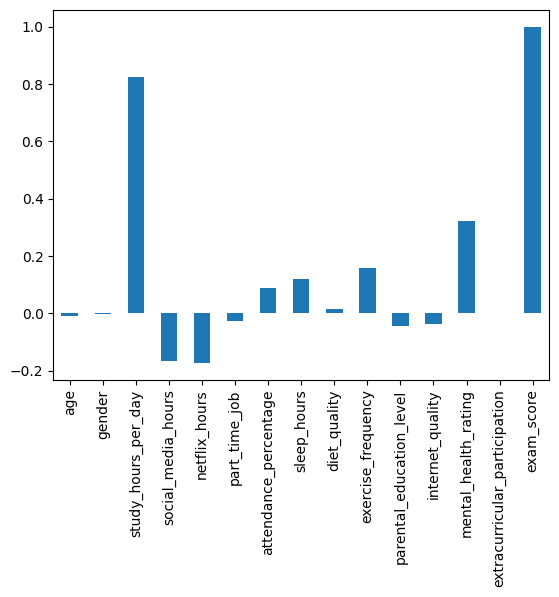

In [58]:
# correlation matrix
dataset.corr()["exam_score"].plot(kind="bar")